# Zdroje 

V **meep** môžeme zdroje elektromagnetickej energie simulovať ako bodové harmonické (spojité) alebo impulzné zdroje. Zdroje sú aditívne, v simulačnej oblasti ich môžeme umiestniť ľubovolný počet. Pre špeciálne prípady je možné definovať aj zdroje s uživateľsky definovaným časovým priebehom. Pomocou definície bodových zdrojov môžeme vytvoriť plošne vyžarujúce zdroje, pomocou ktorých môžeme simulovať napr. budenie vlnovodov alebo mikropáskových štruktúr. \\

Vlastnosti zdrojov ukážeme na 2D oblasti o rozmere 100 x 100 uzlov, v simualčnej oblasti sa okrem zdroja nevyskytujú žiadne iné objekty. Okraj oblasti sú pre zamedzenie odrazov pokryté prispôsobenou vrstvou PML o hrúbke 5 nodov. Zdroj elektrického poľa so zložkou $E_z$ je umiestnený v strede oblasti.

## ContinuousSource

Zdroj [*ContinuousSource*](https://meep.readthedocs.io/en/latest/Python_User_Interface/#continuoussource) reprezentuje bodový spojitý harmonický zdroj elektromagnetickej energie s definovanou konštantnou frekvenciou.

In [37]:
%reset -f 
%matplotlib inline

import meep as mp 
import matplotlib.pyplot as plt

dx = 100
dy = 100
area = mp.Vector3(dx, dy, 0)

sources = [ mp.Source( mp.ContinuousSource(frequency=0.1), 
                       component=mp.Ez, 
                       center=mp.Vector3(0,0,0) )]
                     
sim = mp.Simulation(cell_size=area, boundary_layers=[mp.PML(5.0)],
                    geometry=[], sources=sources, resolution=2)

sim.run(until=80)
data = sim.get_array(center=mp.Vector3(), size=area, component=mp.Ez)

-----------
Initializing structure...
run 0 finished at t = 80.0 (320 timesteps)


Zobrazenie zložky pola $E_z$ v čase $t=80$ a prierez v strede plochy.

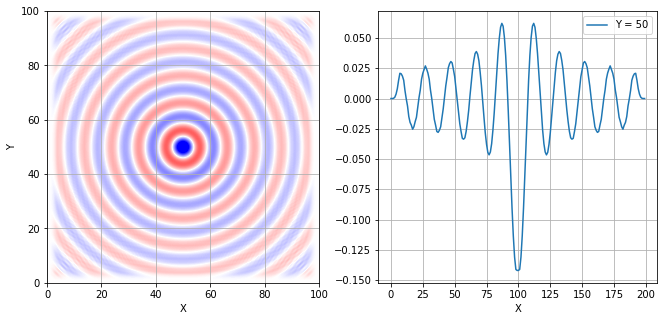

In [39]:
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(121)
 
plt.imshow(data.transpose(), interpolation='spline36', cmap='bwr', alpha=1.0, 
           extent=(0, dx, 0, dy), norm=plt.Normalize(-0.1, 0.1))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

ax = fig.add_subplot(122)
plt.plot(data[100,:], label='Y = 50')
plt.xlabel('X')
plt.grid()
plt.legend()
plt.show()

<!-- REMOVE --> 
Animácia časového vývoja poľa vytvorená programom **anim_src.py** 

<!-- REMOVE -->
<img src="./img/anim_cont_01.gif" width=400 alt="Konfigurácia jednorozmerného simulačného prostredia" scale="0.7">

<!-- REMOVE -->
<img src="./img/anim_cont_02.gif" width=400 alt="Konfigurácia jednorozmerného simulačného prostredia" scale="0.7">